Function: F1
Execution Time: 0.5513126850128174 seconds
Genetic Algorithm Best Solution: [-0.08387894 -0.07909404 -0.15745454 -0.05963207 -0.10389086  0.22897038
 -0.22861834 -0.13736408  0.43837616 -0.21632757 -0.11905176 -0.23364107
 -0.22444535  0.36754161 -0.07751221  0.15634595 -0.29359578  0.07673356
 -0.13454868 -0.11074354  0.32667071  0.13671508  0.2240529  -0.43522406
 -0.01351043 -0.24347455 -0.26508024  0.14305285  0.05285569 -0.01677635
  0.38079591 -0.0722788   0.24653153 -0.06122259 -0.1475256   0.08614206
  0.40562284  0.00313217  0.18644456  0.18548246 -0.47231675 -0.06702183
  0.319792   -0.14488986 -0.01173232  0.3460215  -0.19579813  0.09915493
 -0.1909198  -0.12847656] Objective Value: 2.3898643961277033
Iteration		GA
Iteration 100	GA: 1.0225e+02
Iteration 200	GA: 2.6375e+01
Iteration 300	GA: 7.0458e+00
Function: F2
Execution Time: 6.080867528915405 seconds
Genetic Algorithm Best Solution: [-0.06118359 -1.01975395  0.08982885 -0.12808158  1.84394862  1.03281237
  0

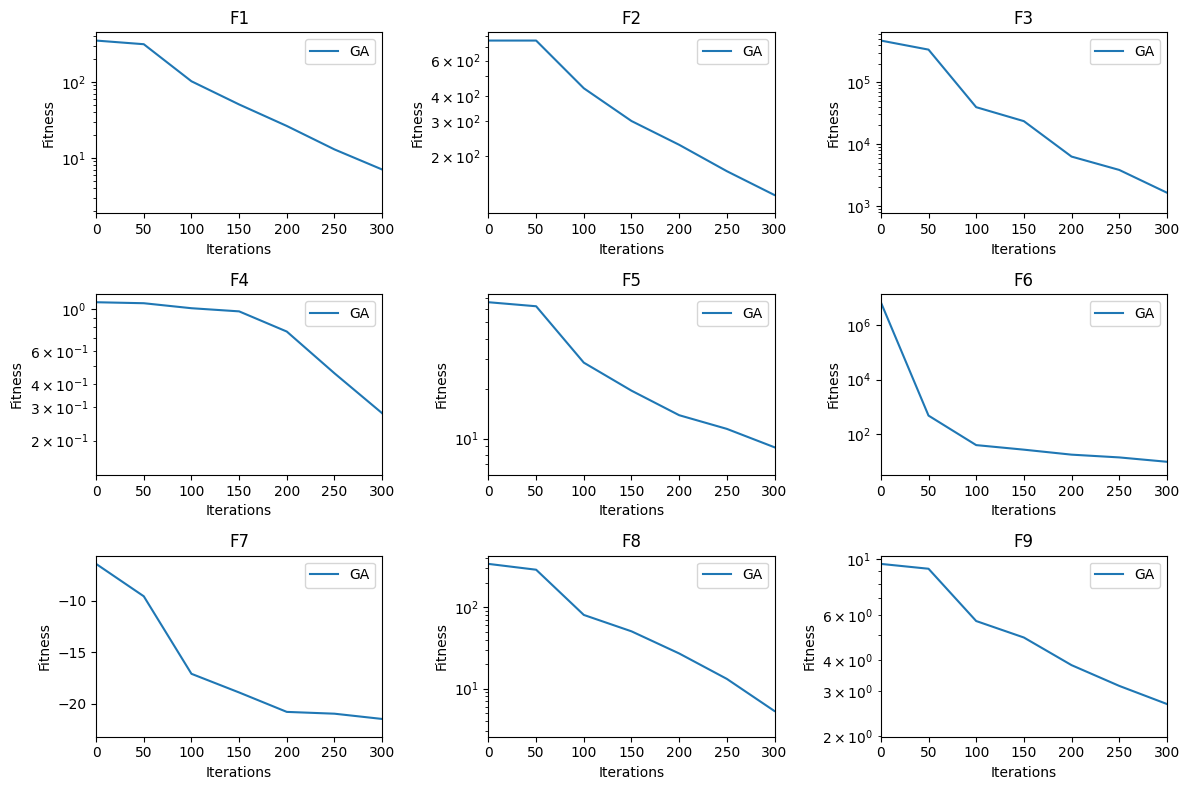

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

# Objective functions
def F1(x):
    return np.sum(x**2)

def F2(x):
    A = 10
    return A * len(x) + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in x])

def F3(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def F4(x):
    return 1/4000 * np.sum(x**2) - np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1)))) + 1

def F5(x):
    return np.sum(np.abs(x * np.sin(x) + 0.1 * x))

def F6(x):
    sum = 0
    sum1 = 1
    for i in range(len(x)):
        sum += np.abs(x[i])
        sum1 *= np.abs(x[i])
    return sum + sum1

def F7(x):  
    m = 10
    return -np.sum(np.sin(x) * np.sin(((np.arange(1, len(x) + 1) * x**2) / np.pi)**(2 * m)))

def F8(x):
    sum = 0
    for i in range(len(x)):
        sum += (x[i] + 0.5) * (x[i] + 0.5)
    return sum

def F9(x):
    n = len(x)
    return -20 * np.exp(-0.2 * np.sqrt(np.sum(x**2) / n)) - np.exp(np.sum(np.cos(2 * np.pi * x)) / n) + 20 + np.exp(1)

# Genetic Algorithm Functions
def create_population(size, dim, lb=-5, ub=5):
    return np.random.uniform(lb, ub, (size, dim))

def fitness_function(population, objective_function):
    fitness = np.array([objective_function(ind) for ind in population])
    fitness_prob = 1 / (fitness + 1e-10)  # Inverse of objective value
    fitness_prob -= np.min(fitness_prob)  # Make sure all probabilities are non-negative
    fitness_prob /= np.sum(fitness_prob)  # Normalize to make sum of probabilities equal to 1
    return fitness_prob

def selection(population, fitness, num_parents):
    parents_idx = np.random.choice(len(population), size=num_parents, replace=False, p=fitness)
    return population[parents_idx]

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        crossover_point = np.random.randint(1, offspring_size[1] - 1)
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, mutation_rate=0.1):
    for idx in range(offspring_crossover.shape[0]):
        if np.random.rand() < mutation_rate:
            random_index = np.random.randint(0, offspring_crossover.shape[1])
            offspring_crossover[idx, random_index] += np.random.normal()
    return offspring_crossover

def genetic_algorithm(population, objective_function, generations, mutation_rate=0.1, elitism_rate=0.1):
    convergence = []
    best_objective_value = np.inf

    for gen in range(generations):
        fitness = fitness_function(population, objective_function)
        parents = selection(population, fitness, len(population) // 2)
        offspring_crossover = crossover(parents, (len(population) - len(parents), population.shape[1]))
        offspring_mutation = mutation(offspring_crossover, mutation_rate)
        population[len(parents):] = offspring_mutation

        # Elitism: Keep top elitism_rate * 100% individuals
        num_elites = int(elitism_rate * len(population))
        elites = population[np.argsort([objective_function(ind) for ind in population])[:num_elites]]
        population[:num_elites] = elites

        best_solution = population[np.argmin([objective_function(ind) for ind in population])]
        current_best_value = objective_function(best_solution)
        if current_best_value < best_objective_value:
            best_objective_value = current_best_value
        if gen % 50 == 0:
            convergence.append(best_objective_value)

    convergence.append(best_objective_value)  # Final value at iteration 100
    return best_solution, convergence


# Function to format results for Iteration 100, 200, 300
def format_results(ga_convergence):
    results = []
    for i in [100, 200, 300]:
        ga_fitness = ga_convergence[i // 50]
        results.append(f"Iteration {i}\tGA: {ga_fitness:.4e}")
    return results

# Main Loop to Test All Functions
functions = [F1, F2, F3, F4, F5, F6, F7, F8, F9]
function_names = ["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9"]

n_iter = 300  # Number of iterations for GA
generations = 300  # Number of generations for GA
population_size = 100  # Population size for GA
dim = 50  # Dimension of the problem
lb = -5
ub = 5

fig, axs = plt.subplots(3, 3, figsize=(12, 8))
axs = axs.ravel()

for i, (func, func_name) in enumerate(zip(functions, function_names)):
    # Step 0: Initial random solutions and select the best
    initial_population = create_population(10, dim)
    initial_objective_values = np.array([func(ind) for ind in initial_population])
    best_initial_index = np.argmin(initial_objective_values)
    initial_solution = initial_population[best_initial_index]
    initial_value = initial_objective_values[best_initial_index]

    time_start = time.time()

    # Genetic Algorithm
    population = create_population(population_size, dim)
    population[0] = initial_solution  # Ensure starting from the same initial solution
    ga_best_solution, ga_convergence = genetic_algorithm(population, func, generations)
    ga_convergence.insert(0, initial_value)  # Insert initial value at the beginning

    time_end = time.time()

    # Print Results
    print(f"Function: {func_name}")
    print("Execution Time:", time_end - time_start, "seconds")
    print("Genetic Algorithm Best Solution:", ga_best_solution, "Objective Value:", func(ga_best_solution))

    # Format and print results for iterations 100, 200, 300
    formatted_results = format_results(ga_convergence)
    print("Iteration\t\tGA")
    for result in formatted_results:
        print(result)  # Printing the detailed iteration results

    # Plot Convergence Comparison
    x_points = np.arange(0, len(ga_convergence) * 50, 50)  # Adjust x_points to match the interval

    axs[i].plot(x_points, ga_convergence, label='GA')
    axs[i].set_title(func_name)
    axs[i].set_xlabel('Iterations')
    axs[i].set_ylabel('Fitness')    
    if func_name != "F7":
        axs[i].set_yscale('log')  
    axs[i].legend()
    axs[i].set_xlim(0, 300)

plt.tight_layout()
plt.show()
